In [29]:
#Solemne 1 Minería de Datos 2024
#Matías Tobar Toledo

In [2]:
from google.cloud import bigquery

In [3]:
#create a client to connect to the BigQuery API
client = bigquery.Client()

In [4]:
#referencia a la base de datos
dataref = client.dataset("covid19_nyt", project="bigquery-public-data")
#api request
dataset = client.get_dataset(dataref)

In [5]:
#lista de tablas en la base de datos covid19_nyt
tables = list(client.list_tables(dataset))
#print nombre de las tablas
for table in tables:
    print(table.table_id)

excess_deaths
mask_use_by_county
us_counties
us_states


In [6]:
#construir referencia a la tabla
tableref = dataset.table("excess_deaths")
#api request
table = client.get_table(tableref)

In [7]:
#print informacion de las columnas de la tabla excess_deaths
table.schema

[SchemaField('country', 'STRING', 'NULLABLE', None, 'The country reported', (), None),
 SchemaField('placename', 'STRING', 'NULLABLE', None, 'The place in the country reported', (), None),
 SchemaField('frequency', 'STRING', 'NULLABLE', None, 'Weekly or monthly, depending on how the data is recorded', (), None),
 SchemaField('start_date', 'DATE', 'NULLABLE', None, 'The first date included in the period', (), None),
 SchemaField('end_date', 'DATE', 'NULLABLE', None, 'The last date included in the period', (), None),
 SchemaField('year', 'STRING', 'NULLABLE', None, 'Year reported', (), None),
 SchemaField('month', 'INTEGER', 'NULLABLE', None, 'Numerical month', (), None),
 SchemaField('week', 'INTEGER', 'NULLABLE', None, 'Epidemiological week, which is a standardized way of counting weeks to allow for year-over-year comparisons. Most countries start epi weeks on Mondays, but others vary', (), None),
 SchemaField('deaths', 'INTEGER', 'NULLABLE', None, 'The total number of confirmed deaths

In [8]:
#La primera columna o campo de la tabla "excess deaths" es "country"
#-> el campo se llama 'country'
#-> el tipo de dato es 'STRING'
#-> el campo es 'NULLABLE' (permite valores nulos)
#-> contiene el nombre del país al que corresponde la fila

In [9]:
#previsualizar las primeras filas de la tabla
client.list_rows(table, max_results=5).to_dataframe()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
0,India,Mumbai,monthly,NaT,NaT,2020,1,<NA>,8397,8360,37,2019 historical data
1,India,Mumbai,monthly,NaT,NaT,2020,2,<NA>,7116,7797,-681,2019 historical data
2,India,Mumbai,monthly,NaT,NaT,2020,3,<NA>,6692,7155,-463,2019 historical data
3,India,Mumbai,monthly,NaT,NaT,2020,4,<NA>,7092,6752,340,2019 historical data
4,India,Mumbai,monthly,NaT,NaT,2020,5,<NA>,13833,7335,6498,2019 historical data


In [11]:
#previsualizar las primeras (100) entradas de la columna 'country'
client.list_rows(table, selected_fields=table.schema[:1], max_results=100).to_dataframe()

,country
0,India
1,India
2,India
3,India
4,India
...,...
95,Italy
96,Indonesia
97,Indonesia
98,Indonesia


In [31]:
query = """
        SELECT deaths, expected_deaths, excess_deaths
        FROM `bigquery-public-data.covid19_nyt.excess_deaths`
        WHERE country = 'Chile'
        """

dry_run_config = bigquery.QueryJobConfig(dry_run=True)
dry_run_query_job = client.query(query, job_config=dry_run_config)
print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 150633 bytes.


In [24]:
#ejecutar la consulta
query_job = client.query(query)

In [25]:
#corre la query y convierte el resultado en un dataframe
Chile_deaths = query_job.to_dataframe()

In [26]:
Chile_deaths

,deaths,expected_deaths,excess_deaths
0,1888,<NA>,<NA>
1,1852,<NA>,<NA>
2,1792,<NA>,<NA>
3,1812,<NA>,<NA>
4,1875,<NA>,<NA>
...,...,...,...
300,2235,2007,228
301,2166,2000,166
302,2205,1995,210
303,2186,1992,194


<Axes: xlabel='deaths', ylabel='expected_deaths'>

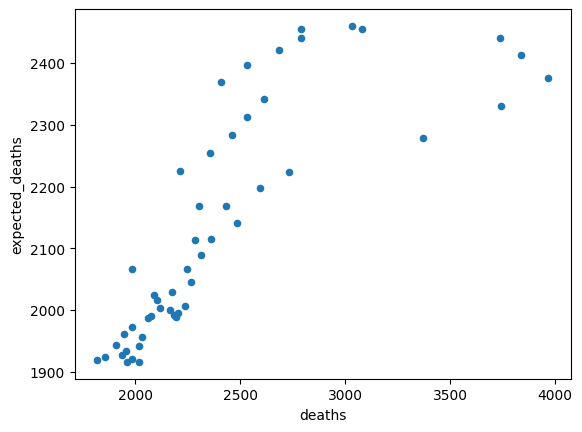

In [30]:
Chile_deaths.plot(x='deaths', y='expected_deaths', kind='scatter')